 <h1>ADVANCED PROGRAMMING FOR AI ASSIGNMENT</h1>
 <h4>Compare different loss functions for regression problems. Define a set of simple
    regression problems, implement a set of baseline network architectures and
    compare different loss functions under fair comparison conditions (initialization,
    number of epochs, ...)</h4>


<style>
    ul{
        list-style: none;
    }
    ul li.first::before{
        content: "\2022";
        color: red;
        display: inline-block;
        width: 1em;
    }
    ul li.second::before{
        content: "\2022";
        color: green;
        display: inline-block;
        width: 1em;
    }
    ul li.third::before{
        content: "\2022";
        color: orange;
        display: inline-block;
        width: 1em;
    }
    ul li.none::before{
        content: "\2022";
        color: gray;
        display: inline-block;
        width: 1em;
    }


</style>

<h4><b>Regression problems</b></h4>
<h5>
    <ul>
        <li class='first'>The first problem is to make a regression on a multivariable context.</li>
        <li class='second'>The second problem is to recreate an image provided as input, as it as, as output.</li>
        <li class='third'>The third problem is to forecast a period of future time, giving a period of the past as input.</li>
    </ul>
</h5>
<h4><b>Data</b></h4>
<h5>
    <ul>
        <li class='first'>
            The first problem is to predict the average house value which is the <b>target</b>,
            instead as <b>input</b> are provided:
            average income, housing average age, average rooms, average bedrooms, population,
            average occupation, latitude, and longitude.<br/>
            The dataset was selected from <b>sklearn</b> python library and is <b>fetch_california_housing</b>.
        </li>
        <li class='second'>
            The second problem is to regenerate the same image that is given like input.<br/>
            The dataset was selected from <b>torchvision</b> python library and is <b>MNIST</b>, which
            contains all images of digits.
        </li>
        <li class='third'>
            The third problem is to forecast the number of passengers having as input a horizon of time and
            as output a future period.<br/>
            The dataset contains the number of passengers by month from 1949 to 1960 and was selected from <b>seaborn</b> python library, the dataset name is <b>flights</b>.
        </li>
    </ul>
</h5>
<h4><b>Neural Network Architecture</b></h4>
<h5>
    <ul>
        <li class='first'>Multilayer Perceptron neural network for the first problem</li>
        <li class='second'>Autoencoder neural network for the second problem</li>
        <li class='third'>LSTM neural network for the third problem</li>
    </ul>
</h5>
<h4><b>Loss Functions</b></h4>
<h5>
    <table>
        <thead>
            <tr><td><b>Loss function</b></td><td><b>Formula</b></td><td><b>Constraint</b></td></tr>
        </thead>
        <tbody>
            <tr><td>Mean Squared Error</td><td><img src='MSE.png'></td><td></td></tr>
            <tr><td>Mean Absolute Error</td><td><img src='MAE.png'></td><td></td></tr>
            <tr><td>Huber Loss</td><td><img src='H1.png'></td><td><img src='H3.png'></td></tr>
            <tr><td>Huber Loss</td><td><img src='H2.png'></td><td><img src='H4.png'></td></tr>
        </tbody>
    </table>
</h5>

<h4><b>Code explaination</b></h4>
<h5>
    For each problem is defined a <b>class</b> for the network and a function <b>networkArchitecture_problem</b> which has as parameters the <b>loss function</b> and the possibility to <b>print the loss</b> (default set to False).
</h5>

<h3>Imports</h3>

In [2]:
# imports block

# MLP
import numpy as np
from sklearn.datasets import fetch_california_housing
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt

# AE 
from torchvision import datasets
from torchvision import transforms

# LSTM
import seaborn as sns

<h3>Pytorch loss functions</h3>

In [23]:
MSE_function = torch.nn.MSELoss()
MAE_function = torch.nn.L1Loss()
Huber_function = torch.nn.HuberLoss(delta=0.5)

<h3>MLP</h3>

In [21]:
class RegressionNet(nn.Module):

    def __init__(self, input_size: int, output_size: int):
        super().__init__()
        self.layer1 = torch.nn.Linear(input_size, 128)
        self.layer2 = torch.nn.Linear(128, 64)
        self.layer3 = torch.nn.Linear(64, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.functional.relu(x)
        x = self.layer2(x)
        x = nn.functional.relu(x)
        x = self.layer3(x)
        return x


def MLP_problem(loss_function, loss_print):

        # load dataset
        dataset = fetch_california_housing()
        n_features = 8
        train_test_index_split_perc = 80
        len_dataset = len(dataset.data)
        train_test_index_split = int((train_test_index_split_perc/100) * len_dataset)

        # DATA
        x_values = dataset.data
        x_values = np.transpose(x_values)

        # normalization on each feature
        for i in range(n_features):
            x_i = x_values[i]
            x_i = x_i / np.max(x_i)
            x_values[i] = x_i
        x_values = np.transpose(x_values)


        y_values = dataset.target
        y_values_MAX = np.max(y_values)
        y_values /= y_values_MAX

        # TRAIN tensors
        x_train = torch.tensor(x_values[:train_test_index_split], dtype=torch.float32)
        y_train = torch.tensor(y_values[:train_test_index_split], dtype=torch.float32)

        # TEST tensors
        x_test = torch.tensor(x_values[train_test_index_split:], dtype=torch.float32)
        y_test = torch.tensor(y_values[train_test_index_split:], dtype=torch.float32)

        input_size = 8
        output_size = 1
        # NET parameters
        learning_rate = 0.01
        epochs = 200
        batch_size = 256

        # net init
        model = RegressionNet(input_size, output_size)
        loss_function = loss_function
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

        if torch.cuda.is_available():
            model.cuda()
            inputs = Variable(x_train.cuda())
            labels = Variable(y_train.cuda())
        else:
            inputs = Variable(x_train)
            labels = Variable(y_train)

        losses = []

        # TRAIN net
        for epoch in range(epochs):

            for i in range(0, len(inputs), batch_size):
                if i + batch_size > len(inputs):
                    break

                inputs_bacth = inputs[i:i + batch_size]
                labels_bacth = labels[i:i + batch_size].unsqueeze(1)

                # net compute output
                outputs = model(inputs_bacth)

                # compute loss
                loss = loss_function(outputs, labels_bacth)

                # optimization steps
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            if loss_print:
                print('epoch {}, loss {}'.format(epoch, loss.item()))
            losses.append(loss.detach().cpu().numpy())

        # TEST net
        with torch.no_grad():
            if torch.cuda.is_available():
                predicted = model(x_test.cuda()).cpu().data.numpy()
            else:
                predicted = model(x_test).data.numpy()

        # Loss plot
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.plot(losses)
        plt.show()

        # predictions plot
        plt.clf()
        plt.xlabel('Houses')
        plt.ylabel('Average income')
        plt.plot(np.arange(len(y_test)), y_test * y_values_MAX, 'go', label=' Real average income', alpha=0.5)
        plt.plot(np.arange(len(y_test)), predicted * y_values_MAX, 'x', label='Forecast average income', alpha=0.5)
        plt.legend(loc='best')
        plt.show()



<h3>MLP loss comparison</h3>

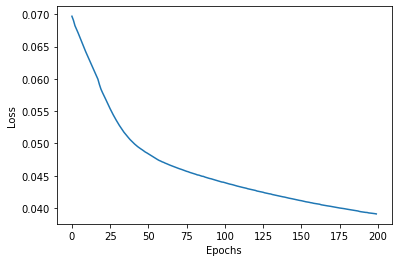

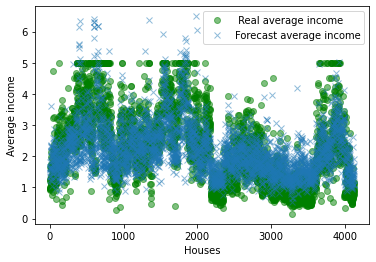

In [24]:
MLP_problem(loss_function=MSE_function, loss_print=False)

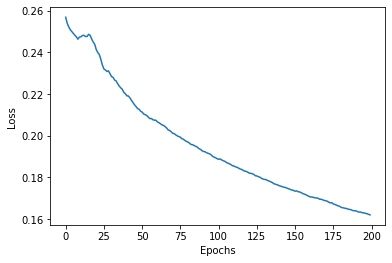

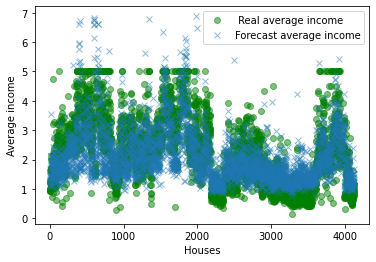

In [25]:
MLP_problem(loss_function=MAE_function, loss_print=False)

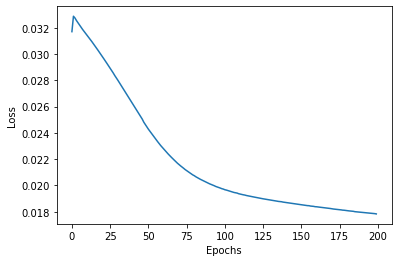

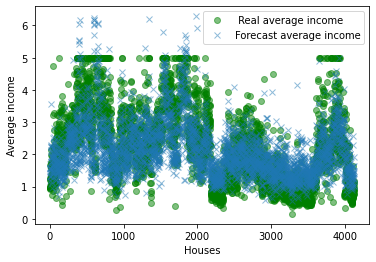

In [28]:
MLP_problem(loss_function=Huber_function, loss_print=False)

<h3>Autoencoder</h3>

In [30]:
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # ENCODER
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 9)
        )

        # DECODER
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(9, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


def AE_problem(loss_function, loss_print):
    # transform images to tensor
    tensor_transform = transforms.ToTensor()

    # download and load dataset
    dataset = datasets.MNIST(root="./data",
                             train=True,
                             download=True,
                             transform=tensor_transform)

    loader = torch.utils.data.DataLoader(dataset=dataset,
                                         batch_size=256,
                                         shuffle=True)

    # net parameters
    epochs = 25
    learning_rate = 0.01
    weight_decay = 1e-8

    # net init
    model = AE().cuda()
    loss_function = loss_function
    optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate,weight_decay=weight_decay)

    losses = []

    # TRAIN net
    for epoch in range(epochs):
        for (image, _) in loader:
            # reshaping the image to (-1, 784)
            image = image.reshape(-1, 28 * 28).cuda()

            # net compute output
            reconstructed = model(image)

            # compute loss
            loss = loss_function(reconstructed, image)

            # optimization steps
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        losses.append(loss.detach().cpu().numpy())

        if loss_print:
            print(f'EPOCH: {epoch}\t\tLOSS: {loss}')

    # Prediction of trained images
    real = image[0].reshape(28, 28).cpu().numpy()
    rec = reconstructed[0].reshape(28, 28).detach().cpu().numpy()

    # Loss plot
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(losses)
    plt.show()

    # prediction plot
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(real, cmap='gray')
    ax[0].set_title('Original')
    ax[0].axis(False)
    ax[1].imshow(rec, cmap='gray')
    ax[1].set_title('Reconstruction')
    ax[1].axis(False)

    plt.show()

<h3>AE loss comparison</h3>

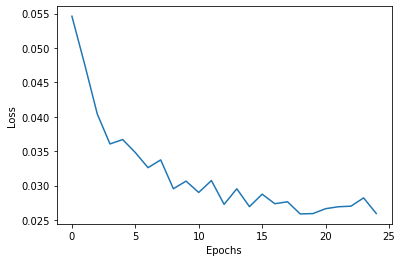

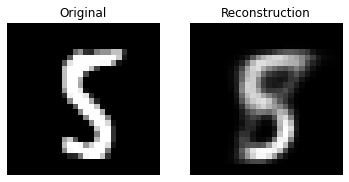

In [31]:
AE_problem(loss_function=MSE_function, loss_print=False)

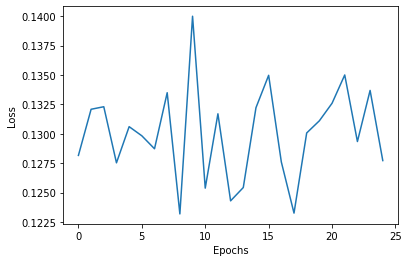

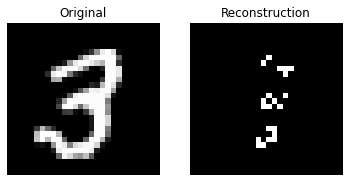

In [38]:
AE_problem(loss_function=MAE_function, loss_print=False)

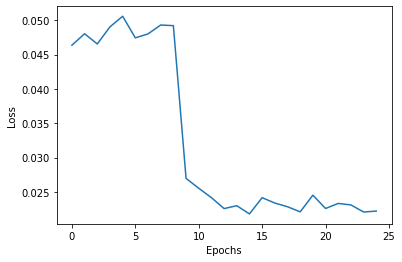

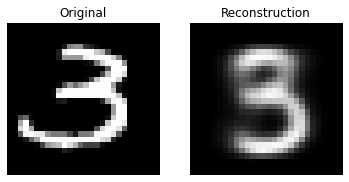

In [33]:
AE_problem(loss_function=Huber_function, loss_print=False)

<h3>LSTM</h3>

In [34]:
class LSTM(nn.Module):
    def __init__(self, input_size, output_size, hidden_layer_size=100):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]



def input_output_sequence(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq



def LSTM_problem(loss_function, loss_print):



    # load dataset
    dataset = sns.load_dataset("flights")

    # train parameter
    train_window = 24
    train_test_index_split_perc = 80

    input_size = 1
    output_size = 1
    # net parameter
    epochs = 35
    learning_rate = 0.0005

    # split the dataset to train
    len_dataset = len(dataset)
    train_test_index_split = int((train_test_index_split_perc / 100) * len_dataset)

    # data normalization
    data = torch.tensor(dataset['passengers'])  / np.max(dataset['passengers'])
    data_train = data[:train_test_index_split]

    # create sample and target
    train_inout_seq = input_output_sequence(data_train, train_window)

    # net init
    model = LSTM(input_size, output_size).cuda()
    loss_function = loss_function
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    losses = []

    # TRAIN net
    for i in range(epochs):
        for seq, labels in train_inout_seq:
            model.hidden_cell = (torch.zeros((1, 1, model.hidden_layer_size)).cuda(),
                                 torch.zeros((1, 1, model.hidden_layer_size)).cuda())
            seq = seq.cuda()
            labels = labels.cuda()

            # net compute output
            y_pred = model(seq)

            # compute loss
            loss = loss_function(y_pred, labels)

            # optimizations step
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if loss_print:
            print(f'epoch: {i:3} loss: {loss.item():10.10f}')
        losses.append(loss.detach().cpu().numpy())


    model.eval()

    # test parameter
    pred = []
    fut_pred = 12

    seq = torch.FloatTensor(data_train[-train_window:]).cuda()

    # TEST net
    for i in range(fut_pred):
        with torch.no_grad():
            model.hidden = (torch.zeros(1, 1, model.hidden_layer_size).cuda(),
                            torch.zeros(1, 1, model.hidden_layer_size).cuda())

            new_value = model(seq).item()
            pred.append(new_value)
            seq = torch.cat([seq[1:], torch.FloatTensor([new_value]).cuda()])

    x = np.arange(len(data_train), len(data_train)+fut_pred, 1)

    # Loss plot
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(losses)
    plt.show()

    # predictions plot
    plt.xlabel('Months')
    plt.ylabel('Passengers')
    plt.grid(True)
    plt.autoscale(axis='x', tight=True)
    plt.plot(data, label='Real passengers')
    plt.plot(x, pred, label='Forecast passengers')
    plt.legend(loc='best')
    plt.show()

<h3>LSTM loss comparison</h3>

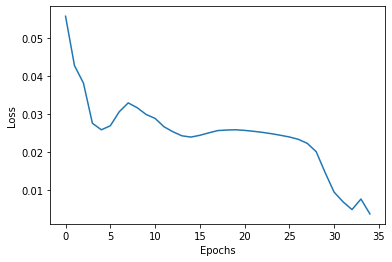

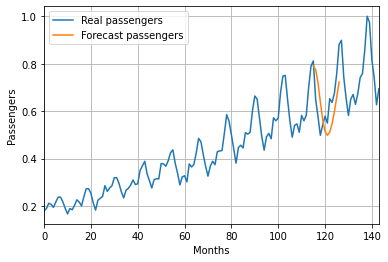

In [35]:
LSTM_problem(loss_function=MSE_function, loss_print=False)

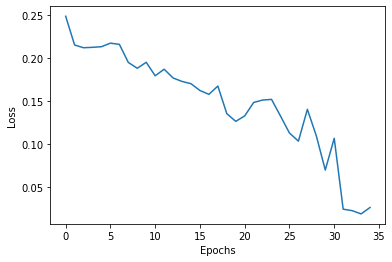

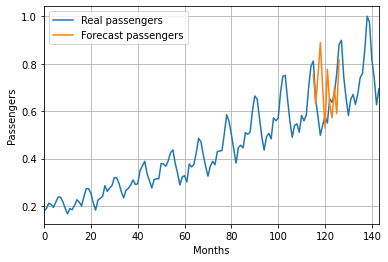

In [36]:
LSTM_problem(loss_function=MAE_function, loss_print=False)

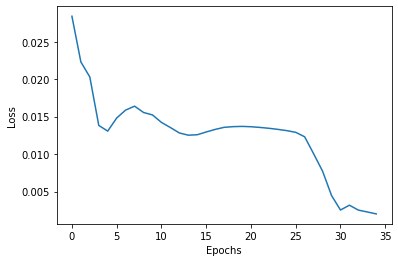

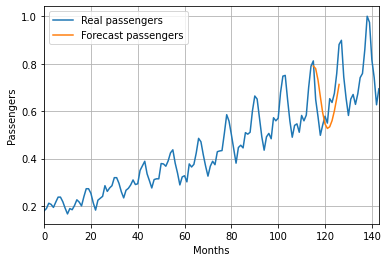

In [37]:
LSTM_problem(loss_function=Huber_function, loss_print=False)

<h3><b>Conclusion</b></h3>

The comparison of the three baseline problems using the <b>MSE</b>, <b>MAE</b>, and <b>Huber</b> loss functions, has been done under the same fair conditions for each different problem.<br/>
What can be noticed for certain is that the <b>MAE</b> loss function seems to be less performant than the other two. Only in the MLP problem it has good outcomes, but probably because it is a really simple problem.<br/>
The <b>MSE</b> loss function works really well in all the problems afforded. <br/>
Instead, <b>Huber</b> loss is the loss which better performs in all three problems, probably due to his propriety to switch from <i>MSE</i> to <i>MAE</i> error based on the <i>delta</i> parameter. 